# Categotical Data Encoding

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [8]:
n_samples = 10
height = 3*np.random.randn(n_samples) + 170 # m0 = 170, Sigma = 3
nationality = np.random.randint(0,3,n_samples)
height, nationality

(array([170.09804649, 168.21996419, 170.31224658, 167.14841296,
        171.22812246, 172.41006861, 166.58649255, 171.37994184,
        169.52345987, 169.96664933]), array([1, 2, 1, 1, 2, 1, 1, 0, 0, 1]))

In [9]:
list(zip(height.round(2), nationality))

[(170.1, 1),
 (168.22, 2),
 (170.31, 1),
 (167.15, 1),
 (171.23, 2),
 (172.41, 1),
 (166.59, 1),
 (171.38, 0),
 (169.52, 0),
 (169.97, 1)]

In [11]:
df = pd.DataFrame(list(zip(height.round(2), nationality)), columns=['height','nationality'])
df

,height,nationality
0,170.10,1
1,168.22,2
2,170.31,1
3,167.15,1
4,171.23,2
5,172.41,1
6,166.59,1
7,171.38,0
8,169.52,0
9,169.97,1


1. Nominal : Blood Type (A,B,O,AB) -> One-Hot Encoding
2. Ordinal (Order)

In [13]:
# One Hot encoding method 1
nat = pd.get_dummies(df['nationality'], prefix='nat_')
nat

,nat__0,nat__1,nat__2
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,0,1,0


In [18]:
# One Hot encoding method 2 : from machine learning library
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder().fit_transform(df.nationality.values.reshape(-1,1)).toarray()
pd.DataFrame(ohe)

/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,0,1,2
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,0.0,1.0,0.0


In [22]:
new_df = pd.concat([df, nat], axis=1)
new_df

,height,nationality,nat__0,nat__1,nat__2
0,170.10,1,0,1,0
1,168.22,2,0,0,1
2,170.31,1,0,1,0
3,167.15,1,0,1,0
4,171.23,2,0,0,1
5,172.41,1,0,1,0
6,166.59,1,0,1,0
7,171.38,0,1,0,0
8,169.52,0,1,0,0
9,169.97,1,0,1,0


In [23]:
new_df.drop('nationality', axis=1, inplace=True)
new_df

,height,nat__0,nat__1,nat__2
0,170.10,0,1,0
1,168.22,0,0,1
2,170.31,0,1,0
3,167.15,0,1,0
4,171.23,0,0,1
5,172.41,0,1,0
6,166.59,0,1,0
7,171.38,1,0,0
8,169.52,1,0,0
9,169.97,0,1,0


In [26]:
# example for generating categorical data
pd.Categorical(list('aboca'))

[a, b, o, c, a]
Categories (4, object): [a, b, c, o]

In [27]:
nationality

array([1, 2, 1, 1, 2, 1, 1, 0, 0, 1])

In [28]:
nat_cate = pd.Categorical(nationality)
nat_cate

[1, 2, 1, 1, 2, 1, 1, 0, 0, 1]
Categories (3, int64): [0, 1, 2]

In [29]:
nationality.max()

2

In [30]:
nat_cate.max()

TypeError: Categorical is not ordered for operation max
you can use .as_ordered() to change the Categorical to an ordered one


In [31]:
# Scaling

height = 3*np.random.randn(10).round(1) + 170
weight = 4*np.random.randn(10).round(1) + 70
height, weight

(array([167.9, 169.1, 173.6, 169.4, 161.9, 172.1, 177.8, 173.6, 170.3,
        169.7]),
 array([66.8, 67.6, 64.8, 64. , 72.8, 64. , 67.2, 68.4, 70.8, 74.8]))

In [33]:
X = pd.DataFrame(list(zip(height, weight)))
X

,0,1
0,167.9,66.8
1,169.1,67.6
2,173.6,64.8
3,169.4,64.0
4,161.9,72.8
5,172.1,64.0
6,177.8,67.2
7,173.6,68.4
8,170.3,70.8
9,169.7,74.8


In [34]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)
X_std # array

array([[-0.66077687, -0.37851106],
       [-0.36042375, -0.14911042],
       [ 0.76590046, -0.95201267],
       [-0.28533547, -1.18141331],
       [-2.16254248,  1.34199376],
       [ 0.39045906, -1.18141331],
       [ 1.81713639, -0.26381074],
       [ 0.76590046,  0.08029022],
       [-0.06007062,  0.76849215],
       [-0.21024719,  1.91549536]])

In [35]:
x = X.values

In [36]:
x_std = StandardScaler().fit_transform(x)
x_std

array([[-0.66077687, -0.37851106],
       [-0.36042375, -0.14911042],
       [ 0.76590046, -0.95201267],
       [-0.28533547, -1.18141331],
       [-2.16254248,  1.34199376],
       [ 0.39045906, -1.18141331],
       [ 1.81713639, -0.26381074],
       [ 0.76590046,  0.08029022],
       [-0.06007062,  0.76849215],
       [-0.21024719,  1.91549536]])

In [38]:
# more on Scaling

df = pd.DataFrame({
    'x1': np.random.normal(0,2,10000), # np.random.randn()과 동일 
    'x2': np.random.normal(5,3,10000), # 첫번째 파라미터는 Mean
    'x3': np.random.normal(-5,5,10000) # 두번째 파라미터는 Sigma
})
df.head()

,x1,x2,x3
0,-0.192884,5.416686,-4.349176
1,-0.271315,6.169862,1.351384
2,0.128633,3.225262,-7.664328
3,-0.605704,6.925867,1.894167
4,1.299432,6.763336,-1.997437


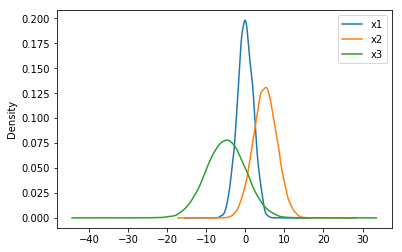

In [39]:
df.plot.kde() # generate kernel density estimate plot

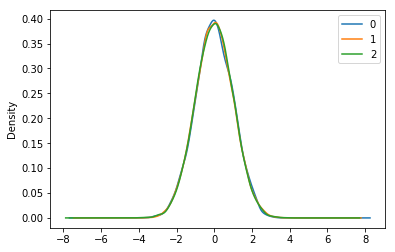

In [40]:
data_df = StandardScaler().fit_transform(df)
pd.DataFrame(data_df).plot.kde()

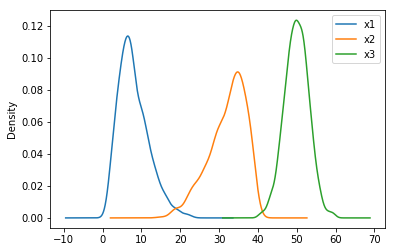

In [41]:
df = pd.DataFrame({
    'x1': np.random.chisquare(8,1000),
    'x2': np.random.beta(8,2,1000) * 40,
    'x3': np.random.normal(50,3,1000)
})
df.plot.kde()

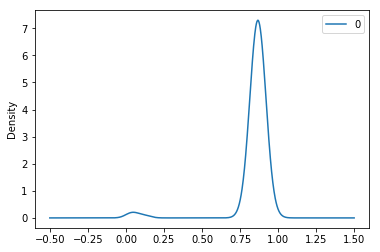

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

pd.DataFrame(MinMaxScaler().fit_transform(df)).plot.kde()

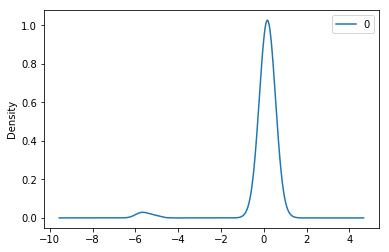

In [53]:
pd.DataFrame(StandardScaler().fit_transform(df)).plot.kde()

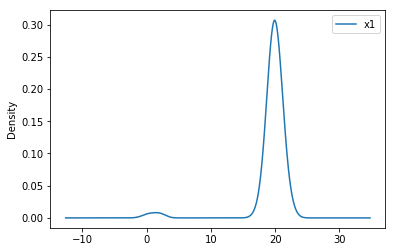

In [54]:
df = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20,1,1000),
                          np.random.normal(1,1,30)]),
#     'x2': np.concatenate([np.random.normal(30,1,1000),
#                           np.random.normal(50,1,30)]),
})
df.plot.kde()

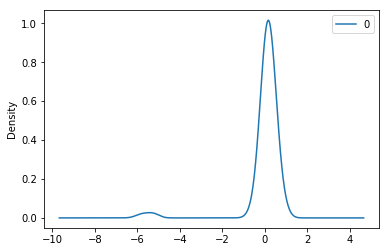

In [55]:
pd.DataFrame(StandardScaler().fit_transform(df)).plot.kde()

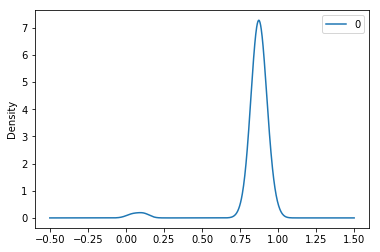

In [56]:
pd.DataFrame(MinMaxScaler().fit_transform(df)).plot.kde()

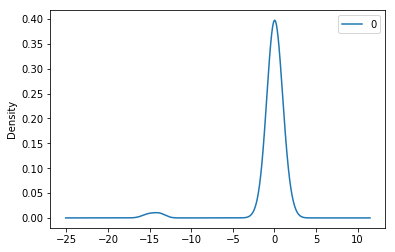

In [57]:
pd.DataFrame(RobustScaler().fit_transform(df)).plot.kde()

In [58]:
# More on Encoding Categorical data
df = pd.DataFrame({
    'age':[33,44,22,44,55,22],
    'Income':['Low', 'Low', 'High', 'Medium', 'Medium', 'High']
})
df

,age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [61]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df['Income_tf'] = LabelEncoder().fit_transform(df.Income)
df

,age,Income,Income_tf
0,33,Low,1
1,44,Low,1
2,22,High,0
3,44,Medium,2
4,55,Medium,2
5,22,High,0


## Text Processing

In [88]:
corpus = [
    'This is the first document awesome food.',
    'This is the second second document',
    'And the third one the is mission impossible.',
    'is this the first document?'
]
df = pd.DataFrame({'Text': corpus})
df

,Text
0,This is the first document awesome food.
1,This is the second second document
2,And the third one the is mission impossible.
3,is this the first document?


In [89]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=['the','is'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [90]:
cv.get_feature_names()

['and',
 'awesome',
 'document',
 'first',
 'food',
 'impossible',
 'mission',
 'one',
 'second',
 'third',
 'this']

In [91]:
cv.vocabulary_

{'this': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 8,
 'and': 0,
 'third': 9,
 'one': 7,
 'mission': 6,
 'impossible': 5}

In [92]:
cv = CountVectorizer(vocabulary=['mission','food','second'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 0],
       [0, 0, 2],
       [1, 0, 0],
       [0, 0, 0]])

In [99]:
cv = CountVectorizer(ngram_range=[1,2])
cv.fit_transform(df.Text).toarray()
cv.vocabulary_

{'this': 28,
 'is': 10,
 'the': 21,
 'first': 6,
 'document': 4,
 'awesome': 2,
 'food': 8,
 'this is': 29,
 'is the': 12,
 'the first': 22,
 'first document': 7,
 'document awesome': 5,
 'awesome food': 3,
 'second': 18,
 'the second': 24,
 'second second': 20,
 'second document': 19,
 'and': 0,
 'third': 26,
 'one': 16,
 'mission': 14,
 'impossible': 9,
 'and the': 1,
 'the third': 25,
 'third one': 27,
 'one the': 17,
 'the is': 23,
 'is mission': 11,
 'mission impossible': 15,
 'is this': 13,
 'this the': 30}

In [100]:
cv = CountVectorizer(ngram_range=[1,2], stop_words='english') # 영어권에서 자주 사용되나 의미없는 단어, 관사 제외
cv.fit_transform(df.Text).toarray()
cv.vocabulary_

{'document': 2,
 'awesome': 0,
 'food': 4,
 'document awesome': 3,
 'awesome food': 1,
 'second': 8,
 'second second': 10,
 'second document': 9,
 'mission': 6,
 'impossible': 5,
 'mission impossible': 7}

In [107]:
# TfidfVectorizer (Term Frequency Inverse Document Frequency)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=[1,2], stop_words='english')
tfidf.fit_transform(df.Text).toarray().round(1)

array([[0.5, 0.5, 0.3, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0.8, 0.4, 0.4],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0.6, 0.6, 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [108]:
tfidf.vocabulary_

{'document': 2,
 'awesome': 0,
 'food': 4,
 'document awesome': 3,
 'awesome food': 1,
 'second': 8,
 'second second': 10,
 'second document': 9,
 'mission': 6,
 'impossible': 5,
 'mission impossible': 7}